In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np

# This file won't run!! Read the README

## Synthetic Dyn

In [3]:
def load_res(path):
    with open(path, 'r') as file:
        res = json.load(file)
    
    return res

# lower_bounds = np.maximum(means - errors, epsilon)
# upper_bounds = means + errors
# lower_errors = means - lower_bounds
# upper_errors = upper_bounds - means
# yerr = [lower_errors, upper_errors]

def log_error_bars(means, stds, expand=False):
    means = np.array(means)
    stds = np.array(stds)
    lower = np.maximum(means - stds, 1e-6)
    upper = means + stds
    if expand:
        return np.expand_dims([means - lower, upper - means], axis=-1)
    else: return [means - lower, upper - means]


In [4]:
res_kur_gkan = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_epid_gkan = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_bio_gkan = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_pop_gkan = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")

res_gkan = [res_kur_gkan, res_epid_gkan, res_bio_gkan, res_pop_gkan]

res_kur_mpnn = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_12/0/post_process_res_final.json")
res_epid_mpnn = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_12/0/post_process_res_final.json")
res_bio_mpnn = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_12/0/post_process_res_final.json")
res_pop_mpnn = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_12/0/post_process_res_final.json")

res_mpnn = [res_kur_mpnn, res_epid_mpnn, res_bio_mpnn, res_pop_mpnn]

res_kur_tss = load_res("./saved_models_optuna/tss/Kuramoto-1/post_process_res.json")
res_epid_tss = load_res("./saved_models_optuna/tss/Epidemics-1/post_process_res.json")
res_bio_tss = load_res("./saved_models_optuna/tss/Biochemical-1/post_process_res.json")
res_pop_tss = load_res("./saved_models_optuna/tss/Population-1/post_process_res.json")

res_tss = [res_kur_tss, res_epid_tss, res_bio_tss, res_pop_tss]

res_kur_llc = load_res("./saved_models_optuna/model-kuramoto-llc/kuramoto_llc_2/0/post_process_res_final_seed.json")
res_epid_llc = load_res("./saved_models_optuna/model-epidemics-llc/epidemics_llc_2/0/post_process_res_final_seed.json")
res_bio_llc = load_res("./saved_models_optuna/model-biochemical-llc/biochemical_llc_2/0/post_process_res_final_seed.json")
res_pop_llc = load_res("./saved_models_optuna/model-population-llc/population_llc_2/0/post_process_res_final_seed.json")

res_llc = [res_kur_llc, res_epid_llc, res_bio_llc, res_pop_llc]

## Plots

In [4]:
plt.rcParams.update({
    "font.size": 20,         # base font size
    "axes.titlesize": 24,    # title
    "axes.labelsize": 18,    # x/y labels
    "xtick.labelsize": 18,   # x-tick labels
    "ytick.labelsize": 18,   # y-tick labels
    "legend.fontsize": 14,   # legend
})

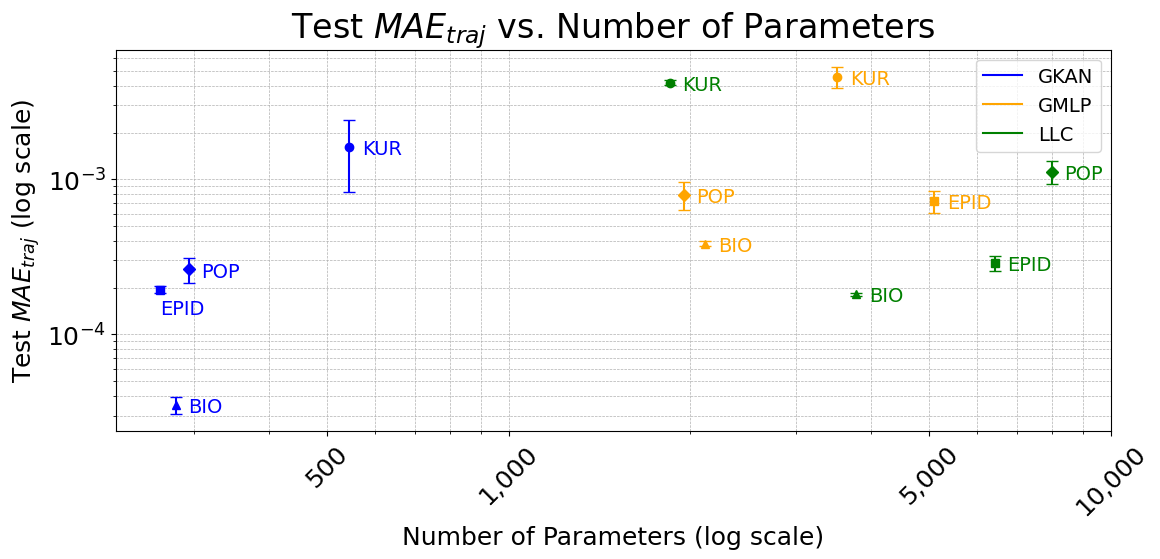

In [6]:
gkan_params = [res["Number of params"] for res in res_gkan]
gkan_losses = [res["model_test_MAE"] for res in res_gkan]
gkan_stds = [res["model_test_Std"] for res in res_gkan]

mpnn_params = [res["Number of params"] for res in res_mpnn]
mpnn_losses = [res["model_test_MAE"] for res in res_mpnn]
mpnn_stds = [res["model_test_Std"] for res in res_mpnn]

llc_params = [res["Number of params"] for res in res_llc]
llc_losses = [res["model_test_MAE"] for res in res_llc]
llc_stds = [res["model_test_Std"] for res in res_llc]

dynamics = ["KUR", "EPID", "BIO", "POP"]
markers = ['o', 's', '^', 'D']  # Unique marker per dynamic

log_std_gkan = [log_error_bars(means, stds, True) for means, stds in zip(gkan_losses, gkan_stds)]
log_std_mpnn = [log_error_bars(means, stds, True) for means, stds in zip(mpnn_losses, mpnn_stds)]
log_std_llc = [log_error_bars(means, stds, True) for means, stds in zip(llc_losses, llc_stds)]



plt.figure(figsize=(12, 6))
for i in range(len(dynamics)):
    # Plot GKAN with error bars
    plt.errorbar(gkan_params[i], gkan_losses[i], 
                 yerr=log_std_gkan[i], fmt=markers[i], 
                 color='blue', label=None, 
                 capsize=4)
    if dynamics[i] == "EPID":
        plt.text(gkan_params[i], gkan_losses[i]*0.7, dynamics[i], 
                fontsize=14, color='blue')
    else:
        plt.text(gkan_params[i]*1.05, gkan_losses[i]*0.9, dynamics[i], 
                fontsize=14, color='blue')

    # Plot MPNN (GMLP) with error bars
    plt.errorbar(mpnn_params[i], mpnn_losses[i], 
                 yerr=log_std_mpnn[i], fmt=markers[i], 
                 color='orange', label=None, 
                 capsize=4)
    plt.text(mpnn_params[i]*1.05, mpnn_losses[i]*0.9, dynamics[i], 
             fontsize=14, color='orange')
    
    # LLC-GP with error bars
    plt.errorbar(llc_params[i], llc_losses[i], 
                 yerr=log_std_llc[i], fmt=markers[i], 
                 color='green', label=None, 
                 capsize=4)
    plt.text(llc_params[i]*1.05, llc_losses[i]*0.9, dynamics[i], 
             fontsize=14, color='green')

# Add one legend entry for each model
plt.errorbar([], [], color='blue', label='GKAN')
plt.errorbar([], [], color='orange', label='GMLP')
plt.errorbar([], [], color='green', label='LLC')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Parameters (log scale)')
plt.ylabel(r'Test $MAE_{traj}$ (log scale)')
plt.title(r'Test $MAE_{traj}$ vs. Number of Parameters')


xticks = [5e2, 1e3, 5e3, 1e4]
plt.xticks(xticks, [f"{int(x):,}" for x in xticks], rotation=45)

plt.legend()
plt.grid(True, which='both', ls='--', linewidth=0.5)
plt.tight_layout()
plt.show()

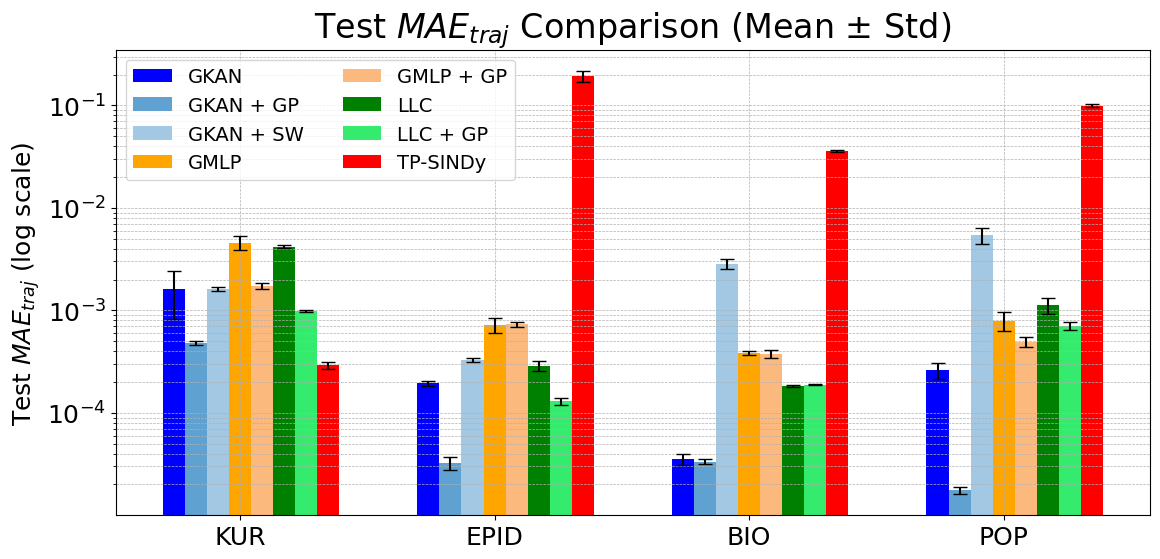

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define datasets and values for each setting
datasets = ['KUR', 'EPID', 'BIO', 'POP']

# Data: Mean and Std for each configuration

gkan_losses = [res["model_test_MAE"] for res in res_gkan]
gkan_stds = [res["model_test_Std"] for res in res_gkan]

black_box_means = [res["black_box_symb_test_MAE"] for res in res_gkan]
black_box_stds = [res["black_box_symb_test_Std"] for res in res_gkan] 

spline_means = [res["spline_wise_symb_test_MAE"] for res in res_gkan]
# print(spline_means)
spline_stds  = [res["spline_wise_symb_test_Std"] for res in res_gkan]

mpnn_losses = [res["model_test_MAE"] for res in res_mpnn]
mpnn_stds = [res["model_test_Std"] for res in res_mpnn]

black_box_mpnn = [res["black_box_symb_test_MAE"] for res in res_mpnn]
black_box_mpnn_stds = [res["black_box_symb_test_Std"] for res in res_mpnn] 

llc_losses = [res["model_test_MAE"] for res in res_llc]
llc_stds = [res["model_test_Std"] for res in res_llc]

black_box_llc = [res["black_box_symb_test_MAE"] for res in res_llc]
black_box_llc_stds = [res["black_box_symb_test_Std"] for res in res_llc] 


tpsindy_means = [res["tss_test_mae_"] for res in res_tss] 
tpsindy_stds = [res["tss_test_std_"] for res in res_tss]


group_spacing = 1.5
x = np.arange(len(datasets)) * group_spacing
width = 0.13

fig, ax = plt.subplots(figsize=(12, 6))

# Define custom color map
colors = {
    "gkan": ['blue', '#5fa2d1', '#a2c8e3'],  # shades of blue
    "mlp":  ['orange', '#fcb97d'],           # shades of orange
    "tss":  ['red'],                         # red
    "llc":  ['green', '#34eb6e']
}

# Bar offset positions
offsets = {
    'GKAN':         -3 * width,
    'GKAN-BB':      -2 * width,
    'GKAN-Spline':  -1 * width,
    'GMLP':          0 * width,
    'GMLP-BB':       1 * width,
    'LLC':           2 * width,
    'LLC-GP':        3 * width,
    'TP-SINDy':      4 * width,
}

# Plot each method at a unique offset
ax.bar(x + offsets['GKAN'], gkan_losses, width, yerr=log_error_bars(gkan_losses, gkan_stds),
       label='GKAN', color=colors["gkan"][0], capsize=5)

ax.bar(x + offsets['GKAN-BB'], black_box_means, width, yerr=log_error_bars(black_box_means, black_box_stds),
       label='GKAN + GP', color=colors["gkan"][1], capsize=5)

ax.bar(x + offsets['GKAN-Spline'], spline_means, width, yerr=log_error_bars(spline_means, spline_stds),
       label='GKAN + SW', color=colors["gkan"][2], capsize=5)

ax.bar(x + offsets['GMLP'], mpnn_losses, width, yerr=log_error_bars(mpnn_losses, mpnn_stds),
       label='GMLP', color=colors["mlp"][0], capsize=5)

ax.bar(x + offsets['GMLP-BB'], black_box_mpnn, width, yerr=log_error_bars(black_box_mpnn, black_box_mpnn_stds),
       label='GMLP + GP', color=colors["mlp"][1], capsize=5)

ax.bar(x + offsets['LLC'], llc_losses, width, yerr=log_error_bars(llc_losses, llc_stds),
       label='LLC', color=colors["llc"][0], capsize=5)

ax.bar(x + offsets['LLC-GP'], black_box_llc, width, yerr=log_error_bars(black_box_llc, black_box_llc_stds),
       label='LLC + GP', color=colors["llc"][1], capsize=5)

ax.bar(x + offsets['TP-SINDy'], tpsindy_means, width, yerr=log_error_bars(tpsindy_means, tpsindy_stds),
       label='TP-SINDy', color=colors["tss"][0], capsize=5)

# Labels and formatting
ax.set_ylabel(r'Test $MAE_{traj}$ (log scale)')
ax.set_title(r'Test $MAE_{traj}$ Comparison (Mean ± Std)')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.legend(loc='best', ncol=2)
ax.grid(True, which="both", ls="--", linewidth=0.5)

plt.tight_layout()
plt.show()

## Noise

In [8]:
res_kur_gkan_70db = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")
res_epid_gkan_70db = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")
res_bio_gkan_70db = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")
res_pop_gkan_70db = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_2.json")

res_kur_gkan_50db = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")
res_epid_gkan_50db = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")
res_bio_gkan_50db = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")
res_pop_gkan_50db = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_2.json")

res_kur_gkan_20db = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_2.json")
res_epid_gkan_20db = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_2.json")
res_bio_gkan_20db = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_2.json")
res_pop_gkan_20db = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_2.json")

res_kur_mpnn_70db = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_final.json")
res_epid_mpnn_70db = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_final.json")
res_bio_mpnn_70db = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_final.json")
res_pop_mpnn_70db = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_noise_70db_2/0/post_process_res_final.json")

res_kur_mpnn_50db = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_final.json")
res_epid_mpnn_50db = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_final.json")
res_bio_mpnn_50db = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_final.json")
res_pop_mpnn_50db = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_noise_50db_2/0/post_process_res_final.json")

res_kur_mpnn_20db = load_res("./saved_models_optuna/model-kuramoto-mpnn/kuramoto_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_final.json")
res_epid_mpnn_20db = load_res("./saved_models_optuna/model-epidemics-mpnn/epidemics_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_final.json")
res_bio_mpnn_20db = load_res("./saved_models_optuna/model-biochemical-mpnn/biochemical_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_final.json")
res_pop_mpnn_20db = load_res("./saved_models_optuna/model-population-mpnn/population_mpnn_ic1_s5_pd_mult_noise_20db_2/0/post_process_res_final.json")

res_kur_llc_70db = load_res("./saved_models_optuna/model-kuramoto-llc/kuramoto_llc_70db_3/0/post_process_res_final_seed.json")
res_epid_llc_70db = load_res("./saved_models_optuna/model-epidemics-llc/epidemics_llc_70db_3/0/post_process_res_final_seed.json")
res_bio_llc_70db = load_res("./saved_models_optuna/model-biochemical-llc/biochemical_llc_70db_3/0/post_process_res_final_seed.json")
res_pop_llc_70db = load_res("./saved_models_optuna/model-population-llc/population_llc_70db_3/0/post_process_res_final_seed.json")

res_kur_llc_50db = load_res("./saved_models_optuna/model-kuramoto-llc/kuramoto_llc_50db_3/0/post_process_res_final_seed.json")
res_epid_llc_50db = load_res("./saved_models_optuna/model-epidemics-llc/epidemics_llc_50db_3/0/post_process_res_final_seed.json")
res_bio_llc_50db = load_res("./saved_models_optuna/model-biochemical-llc/biochemical_llc_50db_3/0/post_process_res_final_seed.json")
res_pop_llc_50db = load_res("./saved_models_optuna/model-population-llc/population_llc_50db_3/0/post_process_res_final_seed.json")

res_kur_llc_20db = load_res("./saved_models_optuna/model-kuramoto-llc/kuramoto_llc_20db_3/0/post_process_res_final_seed.json")
res_epid_llc_20db = load_res("./saved_models_optuna/model-epidemics-llc/epidemics_llc_20db_3/0/post_process_res_final_seed.json")
res_bio_llc_20db = load_res("./saved_models_optuna/model-biochemical-llc/biochemical_llc_20db_3/0/post_process_res_final_seed.json")
res_pop_llc_20db = load_res("./saved_models_optuna/model-population-llc/population_llc_20db_3/0/post_process_res_final_seed.json")


res_kur_gkan_noise = [
    res_kur_gkan_70db, res_kur_gkan_50db, res_kur_gkan_20db
]

res_epid_gkan_noise = [
    res_epid_gkan_70db, res_epid_gkan_50db, res_epid_gkan_20db 
]

res_bio_gkan_noise = [
    res_bio_gkan_70db, res_bio_gkan_50db, res_bio_gkan_20db 
]

res_pop_gkan_noise =[
    res_pop_gkan_70db, res_pop_gkan_50db, res_pop_gkan_20db 
]


res_kur_mpnn_noise = [
    res_kur_mpnn_70db, res_kur_mpnn_50db, res_kur_mpnn_20db
]

res_epid_mpnn_noise = [
    res_epid_mpnn_70db, res_epid_mpnn_50db, res_epid_mpnn_20db 
]

res_bio_mpnn_noise = [
    res_bio_mpnn_70db, res_bio_mpnn_50db, res_bio_mpnn_20db 
]

res_pop_mpnn_noise =[
    res_pop_mpnn_70db, res_pop_mpnn_50db, res_pop_mpnn_20db 
]


res_kur_llc_noise = [
    res_kur_llc_70db, res_kur_llc_50db, res_kur_llc_20db
]

res_epid_llc_noise = [
    res_epid_llc_70db, res_epid_llc_50db, res_epid_llc_20db 
]

res_bio_llc_noise = [
    res_bio_llc_70db, res_bio_llc_50db, res_bio_llc_20db 
]

res_pop_llc_noise =[
    res_pop_llc_70db, res_pop_llc_50db, res_pop_llc_20db 
]


res_kur_tss = load_res("./saved_models_optuna/tss/Kuramoto-1/post_process_res.json")
res_epid_tss = load_res("./saved_models_optuna/tss/Epidemics-1/post_process_res.json")
res_bio_tss = load_res("./saved_models_optuna/tss/Biochemical-1/post_process_res.json")
res_pop_tss = load_res("./saved_models_optuna/tss/Population-1/post_process_res.json")



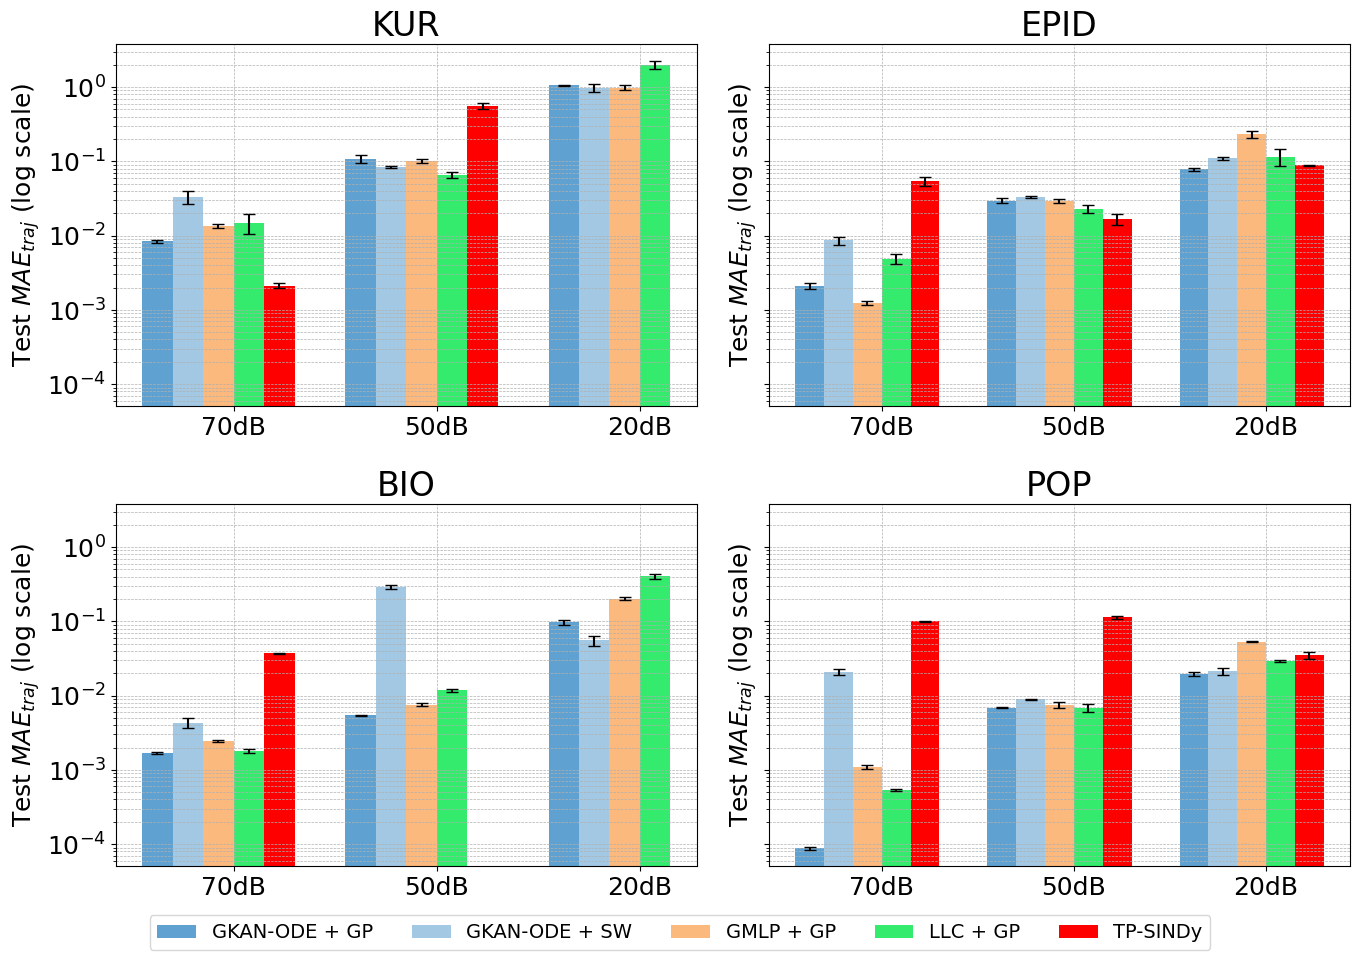

In [9]:
snr_levels = [70, 50, 20]

# Example data for 4 different dynamics (replace with your actual values)
dynamics_data = {
    'KUR': {
        'gkan_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_kur_gkan_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_kur_gkan_noise]
        },
        'gkan_sw': {
            "mae": [res["spline_wise_symb_test_MAE"] for res in res_kur_gkan_noise],
            "std": [res["spline_wise_symb_test_Std"] for res in res_kur_gkan_noise]
        },
        'mpnn_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_kur_mpnn_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_kur_mpnn_noise]
        },
        'llc_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_kur_llc_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_kur_llc_noise]
        },
        "tss": {
            "mae": [res_kur_tss["tss_test_mae_70db"], res_kur_tss["tss_test_mae_50db"]],
            "std": [res_kur_tss["tss_test_std_70db"], res_kur_tss["tss_test_std_50db"]]
        }
    },
    'EPID': {
        'gkan_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_epid_gkan_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_epid_gkan_noise]
        },
        'gkan_sw': {
            "mae": [res["spline_wise_symb_test_MAE"] for res in res_epid_gkan_noise],
            "std": [res["spline_wise_symb_test_Std"] for res in res_epid_gkan_noise]
        },
        'mpnn_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_epid_mpnn_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_epid_mpnn_noise]
        },
        'llc_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_epid_llc_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_epid_llc_noise]
        },
        "tss": {
            "mae": [res_epid_tss["tss_test_mae_70db"], res_epid_tss["tss_test_mae_50db"], res_epid_tss["tss_test_mae_20db"]],
            "std": [res_epid_tss["tss_test_std_70db"], res_epid_tss["tss_test_std_50db"], res_epid_tss["tss_test_std_20db"]]
        }
    },
    'BIO': {
        'gkan_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_bio_gkan_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_bio_gkan_noise]
        },
        'gkan_sw': {
            "mae": [res["spline_wise_symb_test_MAE"] for res in res_bio_gkan_noise],
            "std": [res["spline_wise_symb_test_Std"] for res in res_bio_gkan_noise]
        },
        'mpnn_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_bio_mpnn_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_bio_mpnn_noise]
        },
        'llc_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_bio_llc_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_bio_llc_noise]
        },
        "tss": {
            "mae": [res_bio_tss["tss_test_mae_70db"]],
            "std": [res_bio_tss["tss_test_std_70db"]]
        }
    },
    'POP': {
        'gkan_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_pop_gkan_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_pop_gkan_noise]
        },
        'gkan_sw': {
            "mae": [res["spline_wise_symb_test_MAE"] for res in res_pop_gkan_noise],
            "std": [res["spline_wise_symb_test_Std"] for res in res_pop_gkan_noise]
        },
        'mpnn_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_pop_mpnn_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_pop_mpnn_noise]
        },
        'llc_bb': {
            "mae": [res["black_box_symb_test_MAE"] for res in res_pop_llc_noise],
            "std": [res["black_box_symb_test_Std"] for res in res_pop_llc_noise]
        },
        "tss": {
            "mae": [res_pop_tss["tss_test_mae_70db"], res_pop_tss["tss_test_mae_50db"], res_pop_tss["tss_test_mae_20db"]],
            "std": [res_pop_tss["tss_test_std_70db"], res_pop_tss["tss_test_std_50db"], res_pop_tss["tss_test_std_20db"]]
        }
    }
}

# colors = {
#     "gkan": ['blue', '#5fa2d1', '#a2c8e3'],  # GKAN base, BB, spline
#     "mlp":  ['orange', '#fcb97d'],           # GMLP base, BB
#     "tss":  ['red'],                     # TP-SINDy
#     "llc": ['#34eb6e']
# }

colors = {
    "gkan_bb": "#5fa2d1",
    "gkan_sw": "#a2c8e3",
    "mpnn_bb": "#fcb97d",
    "llc_bb": "#34eb6e",
    "tss": "red"
}

methods = ["gkan_bb", "gkan_sw", "mpnn_bb", "llc_bb", "tss"]

pretty_names = {
    "gkan_bb": "GKAN-ODE + GP",
    "gkan_sw": "GKAN-ODE + SW",
    "mpnn_bb": "GMLP + GP",
    "llc_bb": "LLC + GP",
    "tss": "TP-SINDy"
}

num_plots = len(dynamics_data)
cols = 2
rows = (num_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 10), sharey=True)
axes = axes.flatten()

handles_dict = {}  # collect handles for global legend

for ax, (dyn, data) in zip(axes, dynamics_data.items()):
    n_levels = max(len(v["mae"]) for v in data.values())
    x = np.arange(n_levels)
    width = 0.15

    for i, method in enumerate(methods):
        if method not in data:
            continue

        means = data[method]['mae']
        stds = data[method]['std']

        length = min(len(means), n_levels)
        means = means[:length]
        stds = stds[:length]
        x_plot = x[:length]

        bars = ax.bar(
            x_plot + i*width - width*len(methods)/2,
            means, width,
            yerr=stds,
            color=colors[method],
            capsize=4,
            label=pretty_names[method]
        )

        # store one handle per method (to avoid duplicates)
        if method not in handles_dict:
            handles_dict[method] = bars[0]

    ax.set_xticks(x)
    ax.set_xticklabels([f"{s}dB" for s in snr_levels[:n_levels]])
    ax.set_title(dyn)
    ax.set_yscale('log')
    ax.set_ylabel(r"Test $MAE_{traj}$ (log scale)")
    ax.grid(True, which="both", ls="--", linewidth=0.5)

# global legend above plots
fig.legend(
    handles=[handles_dict[m] for m in methods if m in handles_dict],
    labels=[pretty_names[m] for m in methods if m in handles_dict],
    loc="lower center",
    ncol=len(methods),
    bbox_to_anchor=(0.5, -0.03) 
)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for legend
plt.show()

## Real Epid

In [3]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
import numpy as np

import torch
from main import set_pytorch_seed
from post_processing import get_model, make_callable, plot_predictions
import pandas as pd
import sympy as sp
from sklearn.metrics import mean_absolute_error
from post_processing import build_model_from_file as build_kan
from post_processing_mpnn import build_model_from_file_mpnn as build_mpnn
from post_processing_mpnn import build_model_from_file_llc as build_llc

set_pytorch_seed(0)

/home/ricca/miniconda3/envs/myenv/lib/python3.12/site-packages/juliacall/__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [13]:
from post_processing_real_epid import get_scaler

def eval_real_epid_int(data, countries_dict, build_symb_model, inferred_coeffs, scaler=None, use_euler=False, tr_perc = 0.8, 
                       mask = None, device='cuda:0'):
    y_true = data[0].y.detach().cpu().numpy()
    if mask is not None:
        y_true = y_true[:, mask, :]
    y_pred = np.zeros_like(y_true)
    
    for country_name, node_idx in countries_dict.items():
        symb_model = build_symb_model(country_name, inferred_coeffs)
        symb_model = symb_model.to(device)
        # print(f"{country_name}")
        data_0 = data[0].cpu()
        if scaler is not None:
            tmp = scaler.transform(data[0].x)
            data_0 = data[0]
            data_0.x = tmp
        
        data_0 = data_0.to(device)
        if use_euler:
            symb_model.integration_method = "euler"
            data_0.t_span = torch.arange(y_true.shape[0] + 1, device=data_0.x.device, dtype=data_0.t_span.dtype)
        
        try:
            pred = symb_model(data_0).detach().cpu().numpy()
            if mask is not None:
                pred = pred[:, mask, :]
        except AssertionError:
            print("Failed")
            continue
        
        if scaler is not None:
            pred = scaler.inverse_transform(pred)
        
        y_pred[:, node_idx, :] = pred[:, node_idx, :]
    
        
    tr_len = y_true.shape[0]
    tr_end = int(tr_perc * tr_len)
    y_true_val = y_true[tr_end:, :, :]
    y_pred_val = y_pred[tr_end:, :, :] 
    
    print(f"Test MAE: {mean_absolute_error(y_true_val.flatten(), y_pred_val.flatten())}")
    print(f"Overall MAE: {mean_absolute_error(y_true.flatten(), y_pred.flatten())}")    
    
    return y_true, y_pred, y_true_val, y_pred_val 


def eval_real_epid_journal(data, countries_dict, build_symb_model, inferred_coeffs, tr_perc = 0.8, step_size=1.0, scaler = None,
                           device='cpu', mask=None):
    def get_dxdt_pred(data, symb_model):
        dxdt_pred = []
        for snapshot in data:
            if scaler is not None:
                snapshot.x = scaler.transform(snapshot.x)
            snapshot = snapshot.to(device)
            dxdt_pred.append(symb_model(snapshot))
        
        return torch.stack(dxdt_pred, dim=0)
    
    def sum_over_dxdt(dxdt_pred):
        out = []
        for i in range(dxdt_pred.shape[0]):
            out.append(torch.sum(dxdt_pred[0:i+1, :, :], dim=0)) 
        
        return torch.stack(out, dim=0)
        
    def integrate(out, x0):
        pred = [x0]
        for i in range(out.shape[0] - 1):
            pred.append(x0 + step_size*out[i, :, :])
        return torch.stack(pred, dim=0)
      
    x0 = data[0].x
    if scaler is not None:
        x0 = scaler.transform(x0)
    x0 = x0.to(device)
    y_true = torch.stack([d.x for d in data], dim=0).detach().cpu().numpy()
    if mask is not None:
        y_true = y_true[:, mask, :]
    y_pred = np.zeros_like(y_true)
    
    for country_name, node_idx in countries_dict.items():
        symb_model = build_symb_model(country_name, inferred_coeffs)
        symb_model = symb_model.to(device)
        symb_model.predict_deriv = True
        dxdt_pred = get_dxdt_pred(data, symb_model)
        out = sum_over_dxdt(dxdt_pred)
        pred = integrate(out, x0).detach().cpu().numpy()
        if mask is not None:
            pred = pred[:, mask, :]
        y_pred[:, node_idx, :] = pred[:, node_idx, :]
    
    if scaler is not None:
        y_pred = scaler.inverse_transform(y_pred)    
    
    tr_len = y_true.shape[0]
    tr_end = int(tr_perc * tr_len)
    y_true_val = y_true[tr_end:, :, :]
    y_pred_val = y_pred[tr_end:, :, :] 
    
    print(f"Test MAE: {mean_absolute_error(y_true_val.flatten(), y_pred_val.flatten())}")
    print(f"Overall MAE: {mean_absolute_error(y_true.flatten(), y_pred.flatten())}")  
    
    return y_true, y_pred, y_true_val, y_pred_val

In [20]:
def save_country_predictions(y_true, preds_dict, countries_dict, save_dir="./outputs/covid"):

    os.makedirs(save_dir, exist_ok=True)

    for country_name, node_idx in countries_dict.items():
        true_vals = y_true[:, node_idx, 0]

        plt.figure(figsize=(10, 6))
        # Ground truth
        plt.plot(true_vals, label="True", linewidth=2, color="black")

        # Predictions for each model
        for model_name, (y_pred, color) in preds_dict.items():
            pred_vals = y_pred[:, node_idx, 0]
            plt.plot(pred_vals, linestyle="--", label=model_name, color=color)

        plt.title(f"{country_name} - Model Comparison")
        plt.xlabel("Days")
        plt.ylabel("Infected Count")
        plt.legend()
        plt.tight_layout()

        filename = os.path.join(save_dir, f"{country_name}_comparison.png")
        plt.savefig(filename, dpi=150)
        plt.close()

In [21]:
from datasets.RealEpidemics import RealEpidemics

real_epid_data = RealEpidemics(
    root = './data_real_epid_covid_int',
    name = 'RealEpid',
    predict_deriv=False,
    history=1,
    horizon=44,
    scale=False
)

data_real_epid_orig = RealEpidemics(
    root = './data_real_epid_covid_orig',
    name = 'RealEpid',
    predict_deriv=True,
    scale=False,
)

with open('./data_real_epid_covid_int/RealEpid/countries_dict.json', 'r') as f:
    countries_dict = json.load(f)
    
all_res_covid_traj = {}
all_res_covid_eul = {}

### Raw Models

In [14]:
raw_gkan_covid = build_kan(
    model_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0",
    message_passing=False,
    include_time=False,
    method="dopri5",
    adjoint=False
)

raw_mpnn_covid = build_mpnn(
    model_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0",
    message_passing=False,
    include_time=False,
    method = "dopri5",
    adjoint=False
)

raw_llc_covid = build_llc(
    model_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0",
    message_passing=False,
    include_time=False,
    method = "dopri5",
    adjoint=False
)

def eval_raw_epid(raw_model, real_epid_data, real_epid_orig, countries_dict):
    scaler = get_scaler(data = real_epid_data, tr_perc=0.8)
    raw_model = raw_model.eval()
    raw_model.predict_deriv = False
    raw_model.all_t = True
    build_raw = lambda x, y: raw_model
    
    with torch.no_grad():
        _, _, _, _ = eval_real_epid_int(
            data = real_epid_data,
            countries_dict=countries_dict,
            build_symb_model=build_raw,
            scaler=scaler,
            use_euler=False,
            inferred_coeffs=None,
            tr_perc=0.9
        )
    
    print("\nJournal Integration\n")

    t = real_epid_data.t_sampled
    epsilon = t[0][1] - t[0][0]

    raw_model.predict_deriv = True
    build_raw = lambda x, y: raw_model

    with torch.no_grad():
        _, _, _, _ = eval_real_epid_journal(
            data = real_epid_orig,
            countries_dict=countries_dict,
            build_symb_model=build_raw,
            tr_perc=0.9,
            step_size=epsilon.item(),
            inferred_coeffs=None,
            scaler=scaler,
            device='cuda:0'
        )

### TSS 2

In [15]:
def build_symb_model_tss(country, inf_coeff):
    x_i, x_j = sp.symbols('x_i x_j')    
    country_idx = countries_dict[country]

    g_symb = inf_coeff[1, country_idx] * (1 / (1 + sp.exp(- (x_j - x_i))))
    h_symb = inf_coeff[0, country_idx] * x_i
    
    g_symb = make_callable(g_symb)
    h_symb = make_callable(h_symb)

    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='rk4'
    )
    
    # conv = ODEGraphLayer(
    #     a = np.expand_dims(inf_coeff[0, :],axis=-1),
    #     b = np.expand_dims(inf_coeff[1, :], axis=-1),
    #     device='cuda:0'
    # )
    
    # symb_model = MPNN_ODE(
    #     conv=conv,
    #     model_path="./saved_models_optuna/tmp_symb",
    #     adjoint=True,
    #     integration_method="rk4",
    #     atol=1e-5,
    #     rtol=1e-5,
    #     options = {},
    #     all_t=True
    # )
    
    # symb_model = symb_model.eval()
    
    return symb_model

In [19]:
inf_coeff_covid = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/inf_coeffs_all_covid.csv").values

y_true_tss, y_pred_tss, y_true_val_tss, y_pred_val_tss = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_covid,
    build_symb_model=build_symb_model_tss,
    use_euler=True,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss,
        y_pred=y_pred_tss,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_covid"
    )
    
print("Journal Integration\n")
inf_coeff_covid = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/inf_coeffs_test_covid.csv").values

y_true_tss_jrn, y_pred_tss_jrn, y_true_val_tss_jrn, y_pred_val_tss_jrn = eval_real_epid_journal(
    data = data_real_epid_orig,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_tss,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.9,
    step_size=1.0
)


for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss_jrn,
        y_pred=y_pred_tss_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_covid_journal"
    )
    
all_res_covid_traj["TP-SINDy"] = (y_pred_tss.copy(), "red")
all_res_covid_eul["TP-SINDy"] = (y_pred_tss_jrn.copy(), "red")

Test MAE: 54085.0234375
Overall MAE: 10951.21484375
Journal Integration

Test MAE: 881.3953247070312
Overall MAE: 258.5760192871094


### GKAN

In [24]:
def build_symb_model_gkan(country, inf_coeff):
    x_i, x_j = sp.symbols('x_i x_j')    

    coeffs = inf_coeff[country]
    a, b, c = coeffs.iloc[0], coeffs.iloc[1], coeffs.iloc[2] 

    g_symb = c * sp.exp(x_j)
    h_symb = b * x_i + a
    
    g_symb = make_callable(g_symb)
    h_symb = make_callable(h_symb)
    
    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='dopri5'
    )
    
    return symb_model

In [25]:
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_covid_ts_correct.csv")

y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_gkan,
    scaler=scaler,
    use_euler=False,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.9
)

all_res_covid_traj["GKAN + GP"] = (y_pred_gkan.copy(), "#5fa2d1")

Test MAE: 950.6076049804688
Overall MAE: 397.4226379394531


In [19]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan,
        y_pred=y_pred_gkan,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures"
    )

#### Journal

In [20]:
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_covid_ts_correct.csv")
t = real_epid_data.t_sampled
epsilon = t[0][1] - t[0][0]
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_orig,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_gkan,
    tr_perc=0.9,
    step_size=epsilon.item(),
    inferred_coeffs=inf_coeff_covid,
    scaler=scaler,
)

all_res_covid_eul["GKAN + GP"] = (y_pred_gkan_jrn.copy(), "#5fa2d1")

Test MAE: 1148.6702880859375
Overall MAE: 409.2347412109375


In [21]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan_jrn,
        y_pred=y_pred_gkan_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures_journal"
    )

### GKAN SW

In [22]:
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_covid_sw.csv")

def build_model_sw(country, inf_coeff):

    
    coeffs = inf_coeff[country]
    r, h, l, i, k, j, m, q, n, o, p, g, a, c, b, d, f, e = coeffs.iloc[0:]
    
    expr1 = a*sp.tanh(b*x_i + c) + d*sp.tanh(e*x_j + f) + g        
    expr2 = h*sp.tanh(i*sp.tanh(j*x_i + k) + l) + m*sp.tanh(n*x_i**3 + o*x_i**2 + p*x_i + q) + r
    
    g_symb = make_callable(expr1)
    h_symb = make_callable(expr2)
    
    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='dopri5'
    )
    
    return symb_model


y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    build_symb_model=build_model_sw,
    scaler=scaler,
    use_euler=False,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.9
)

t = real_epid_data.t_sampled
epsilon = t[0][1] - t[0][0]

print("\nJournal int\n")

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_orig,
    countries_dict=countries_dict,
    build_symb_model=build_model_sw,
    tr_perc=0.9,
    step_size=epsilon,
    inferred_coeffs=inf_coeff_covid,
    scaler=scaler
)

all_res_covid_traj["GKAN + SW"] = (y_pred_gkan.copy(), "#a2c8e3")
all_res_covid_eul["GKAN + SW"] = (y_pred_gkan_jrn.copy(), "#a2c8e3")

Test MAE: 669.2266235351562
Overall MAE: 367.4915466308594

Journal int

Test MAE: 939.890869140625
Overall MAE: 361.2289123535156


### MPNN

In [23]:
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/inferred_coeffs_covid_ts.csv")

def build_symb_model_mpnn(country, inf_coeff):
    
    coeffs = inf_coeff[country]
    a, _, b, _, c, = coeffs.iloc[0], coeffs.iloc[1], coeffs.iloc[2], coeffs.iloc[3], coeffs.iloc[4] 

    
    expr1 = sp.ln(sp.Max(sp.tan(x_i + c)**2 + 1, 1e-6))
    expr2 = a * sp.ln(sp.Max(x_i + b, 1e-6))
    
    g_symb = make_callable(expr1)
    h_symb = make_callable(expr2)
    
    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='dopri5'
    )
    
    return symb_model

y_true_mpnn, y_pred_mpnn, y_true_val_mpnn, y_pred_val_mpnn = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_mpnn,
    scaler=scaler,
    use_euler=False,
    inferred_coeffs=inf_coeff_covid,
    tr_perc=0.9
)

all_res_covid_traj["MPNN + GP"] = (y_pred_mpnn.copy(), "#fcb97d")


Test MAE: 640.311767578125
Overall MAE: 295.4835205078125


In [24]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn,
        y_pred=y_pred_mpnn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures"
    )

#### Journal

In [25]:
t = real_epid_data.t_sampled
epsilon = t[0][1] - t[0][0]
scaler = get_scaler(data = real_epid_data, tr_perc=0.8)

y_true_mpnn_jrn, y_pred_mpnn_jrn, y_true_val_mpnn_jrn, y_pred_val_mpnn_jrn = eval_real_epid_journal(
    data = data_real_epid_orig,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_mpnn,
    tr_perc=0.9,
    step_size=epsilon,
    inferred_coeffs=inf_coeff_covid,
    scaler=scaler
)

all_res_covid_eul["MPNN + GP"] = (y_pred_mpnn_jrn.copy(), "#fcb97d")

Test MAE: 978.9033813476562
Overall MAE: 334.7503356933594


In [26]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn_jrn,
        y_pred=y_pred_mpnn_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures_journal"
    )

### LLC

In [27]:
def build_symb_model_llc(country, inf_coeff):
    
    coeffs = inf_coeff[country]
    a, b, c = coeffs.iloc[0], coeffs.iloc[1], coeffs.iloc[2]

    expr1 = c*((x_i - x_j) * sp.exp(- x_j))
    expr2 = a * sp.tanh(x_i + b)
    
    g_symb = make_callable(expr1)
    h_symb = make_callable(expr2)
    
    symb_model = get_model(
        g = g_symb,
        h = h_symb,
        message_passing=False,
        include_time=False,
        integration_method='dopri5'
    )
    
    return symb_model

In [28]:
scaler_covid = get_scaler(data = real_epid_data, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_covid = pd.read_csv("./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/inferred_coeffs_covid_new.csv")

y_true_llc, y_pred_llc, y_true_val_llc, y_pred_val_llc = eval_real_epid_int(
    data = real_epid_data,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_covid,
    build_symb_model=build_symb_model_llc,
    scaler=scaler_covid,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_llc,
        y_pred=y_pred_llc,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/figures_covid"
    )

print("Journal int\n")

t = real_epid_data.t_sampled
epsilon = t[0][1] - t[0][0]
    
y_true_llc_jrn, y_pred_llc_jrn, y_true_val_llc_jrn, y_pred_val_llc_jrn = eval_real_epid_journal(
    data = data_real_epid_orig,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_llc,
    inferred_coeffs=inf_coeff_covid,
    scaler=scaler_covid,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_llc_jrn,
        y_pred=y_pred_llc_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/figures_covid_journal"
    )
    
all_res_covid_traj["LLC + GP"] = (y_pred_llc.copy(), "#34eb6e")
all_res_covid_eul["LLC + GP"] = (y_pred_llc_jrn.copy(), "#34eb6e")

Test MAE: 991.1400756835938
Overall MAE: 371.1968688964844
Journal int

Test MAE: 1049.9173583984375
Overall MAE: 334.60064697265625


## Plot comparison

In [29]:
save_country_predictions(
    y_true_llc,
    preds_dict=all_res_covid_traj,
    countries_dict=countries_dict,
    save_dir = "./outputs/covid_traj"
)

In [30]:
save_country_predictions(
    y_true_llc_jrn,
    preds_dict=all_res_covid_eul,
    countries_dict=countries_dict,
    save_dir="./outputs/covid_eul"
)

## Generalization on H1N1 data 

In [31]:
real_epid_h1n1 = RealEpidemics(
    root = './data_real_epid_h1n1_int',
    name = 'RealEpid',
    predict_deriv=False,
    history=1,
    horizon=44,
    scale=False,
    infection_data="./data/RealEpidemics/infected_numbers_H1N1.csv",
    inf_threshold=100
)

data_real_epid_orig_h1n1 = RealEpidemics(
    root = './data_real_epid_h1n1_orig',
    name = 'RealEpid',
    predict_deriv=True,
    scale=False,
    infection_data="./data/RealEpidemics/infected_numbers_H1N1.csv",
    inf_threshold=100
)

with open('./data_real_epid_h1n1_int/RealEpid/countries_dict.json', 'r') as f:
    countries_dict = json.load(f)
    
all_res_h1n1_traj = {}
all_res_h1n1_eul = {}

### TSS 2

In [32]:
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/inf_coeffs_all_h1n1.csv").values

y_true_tss, y_pred_tss, y_true_val_tss, y_pred_val_tss = eval_real_epid_int(
    data = real_epid_h1n1,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_h1n1,
    build_symb_model=build_symb_model_tss,
    use_euler=True,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss,
        y_pred=y_pred_tss,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_h1n1"
    )

print("Journal Integration\n")
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/inf_coeffs_test_h1n1.csv").values

y_true_tss_jrn, y_pred_tss_jrn, y_true_val_tss_jrn, y_pred_val_tss_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_h1n1,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_tss,
    inferred_coeffs=inf_coeff_h1n1,
    tr_perc=0.9,
    step_size=1.0
)


for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss_jrn,
        y_pred=y_pred_tss_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_h1n1_journal"
    )

all_res_h1n1_traj["TP-SINDy"] = (y_pred_tss.copy(), "red")
all_res_h1n1_eul["TP-SINDy"] = (y_pred_tss_jrn.copy(), "red")

Test MAE: 2220.902587890625
Overall MAE: 718.156005859375
Journal Integration

Test MAE: 202.747802734375
Overall MAE: 82.75919342041016


### GKAN

In [33]:
scaler_h1n1 = get_scaler(data = real_epid_h1n1, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_h1n1_ts_correct.csv")

y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_h1n1,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_h1n1,
    build_symb_model=build_symb_model_gkan,
    scaler=scaler_h1n1,
    tr_perc=0.9
)

all_res_h1n1_traj["GKAN + GP"] = (y_pred_gkan.copy(), "#5fa2d1")

Test MAE: 220.84352111816406
Overall MAE: 125.45842742919922


In [34]:
for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan,
        y_pred=y_pred_gkan,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures_h1n1"
    )

#### Journal

In [35]:
t = real_epid_h1n1.t_sampled
epsilon = t[0][1] - t[0][0]
scaler_h1n1 = get_scaler(data = real_epid_h1n1, tr_perc=0.8)
print(epsilon)
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_h1n1_ts_correct.csv")

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_h1n1,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_gkan,
    inferred_coeffs=inf_coeff_h1n1,
    scaler=scaler_h1n1,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan_jrn,
        y_pred=y_pred_gkan_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures_h1n1_journal"
    )

all_res_h1n1_eul["GKAN + GP"] = (y_pred_gkan_jrn.copy(), "#5fa2d1")

tensor(0.0227)
Test MAE: 270.926513671875
Overall MAE: 121.0452651977539


### GKAN SW

In [36]:
scaler_h1n1 = get_scaler(data = real_epid_h1n1, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_h1n1_sw.csv")

y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_h1n1,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_h1n1,
    build_symb_model=build_model_sw,
    scaler=scaler_h1n1,
    tr_perc=0.9
)

print("\nJournal integration\n")
t = real_epid_h1n1.t_sampled
epsilon = t[0][1] - t[0][0]

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_h1n1,
    countries_dict=countries_dict,
    build_symb_model=build_model_sw,
    inferred_coeffs=inf_coeff_h1n1,
    scaler=scaler_h1n1,
    step_size=epsilon,
    tr_perc=0.9
)

all_res_h1n1_traj["GKAN + SW"] = (y_pred_gkan.copy(), "#a2c8e3")
all_res_h1n1_eul["GKAN + SW"] = (y_pred_gkan_jrn.copy(), "#a2c8e3")

Test MAE: 208.47280883789062
Overall MAE: 132.3151092529297

Journal integration

Test MAE: 317.6393737792969
Overall MAE: 127.59087371826172


### MPNN

In [37]:
scaler_h1n1 = get_scaler(data = real_epid_h1n1, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/inferred_coeffs_h1n1_ts.csv")

y_true_mpnn, y_pred_mpnn, y_true_val_mpnn, y_pred_val_mpnn = eval_real_epid_int(
    data = real_epid_h1n1,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_h1n1,
    build_symb_model=build_symb_model_mpnn,
    scaler=scaler_h1n1,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn,
        y_pred=y_pred_mpnn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures_h1n1"
    )

print("Journal int\n")

t = real_epid_h1n1.t_sampled
epsilon = t[0][1] - t[0][0]
    
y_true_mpnn_jrn, y_pred_mpnn_jrn, y_true_val_mpnn_jrn, y_pred_val_mpnn_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_h1n1,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_mpnn,
    inferred_coeffs=inf_coeff_h1n1,
    scaler=scaler_h1n1,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn_jrn,
        y_pred=y_pred_mpnn_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures_h1n1_journal"
    )

all_res_h1n1_traj["MPNN + GP"] = (y_pred_mpnn.copy(), "#fcb97d")
all_res_h1n1_eul["MPNN + GP"] = (y_pred_mpnn_jrn.copy(), "#fcb97d")


Test MAE: 210.56785583496094
Overall MAE: 165.40347290039062
Journal int

Test MAE: 838.7059326171875
Overall MAE: 275.66668701171875


### LLC

In [38]:
scaler_h1n1 = get_scaler(data = real_epid_h1n1, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_h1n1 = pd.read_csv("./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/inferred_coeffs_h1n1_new.csv")

y_true_llc, y_pred_llc, y_true_val_llc, y_pred_val_llc = eval_real_epid_int(
    data = real_epid_h1n1,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_h1n1,
    build_symb_model=build_symb_model_llc,
    scaler=scaler_h1n1,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_llc,
        y_pred=y_pred_llc,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/figures_h1n1"
    )

print("Journal int\n")

t = real_epid_h1n1.t_sampled
epsilon = t[0][1] - t[0][0]
    
y_true_llc_jrn, y_pred_llc_jrn, y_true_val_llc_jrn, y_pred_val_llc_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_h1n1,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_llc,
    inferred_coeffs=inf_coeff_h1n1,
    scaler=scaler_h1n1,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_llc_jrn,
        y_pred=y_pred_llc_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/figures_h1n1_journal"
    )

all_res_h1n1_traj["LLC + GP"] = (y_pred_llc.copy(), "#34eb6e")
all_res_h1n1_eul["LLC + GP"] = (y_pred_llc_jrn.copy(), "#34eb6e")

Test MAE: 567.9987182617188
Overall MAE: 168.8201446533203
Journal int

Test MAE: 677.1369018554688
Overall MAE: 236.02980041503906


## Plot comparison

In [39]:
save_country_predictions(
    y_true_llc,
    preds_dict=all_res_h1n1_traj,
    countries_dict=countries_dict,
    save_dir="./outputs/h1n1_traj"
)

save_country_predictions(
    y_true_llc_jrn,
    preds_dict=all_res_h1n1_eul,
    countries_dict=countries_dict,
    save_dir="./outputs/h1n1_eul"
)

## Generalization SARS Data

In [11]:
from datasets.RealEpidemics import RealEpidemics

real_epid_sars = RealEpidemics(
    root = './data_real_epid_sars_int',
    name = 'RealEpid',
    predict_deriv=False,
    history=1,
    horizon=44,
    scale=False,
    infection_data="./data/RealEpidemics/infected_numbers_sars.csv",
    inf_threshold=100
)

data_real_epid_orig_sars = RealEpidemics(
    root = './data_real_epid_sars_orig',
    name = 'RealEpid',
    predict_deriv=True,
    scale=False,
    infection_data="./data/RealEpidemics/infected_numbers_sars.csv",
    inf_threshold=100
)

with open('./data_real_epid_sars_int/RealEpid/countries_dict.json', 'r') as f:
    countries_dict = json.load(f)
    
all_res_sars_traj = {}
all_res_sars_eul = {}

### TSS2

In [12]:
inf_coeff_sars = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/inf_coeffs_all_sars.csv").values

y_true_tss, y_pred_tss, y_true_val_tss, y_pred_val_tss = eval_real_epid_int(
    data = real_epid_sars,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_sars,
    build_symb_model=build_symb_model_tss,
    use_euler=True,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss,
        y_pred=y_pred_tss,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_sars"
    )

print("Journal Integration\n")
inf_coeff_sars = pd.read_csv("./saved_models_optuna/tss/real_epid_covid/inf_coeffs_test_sars.csv").values

y_true_tss_jrn, y_pred_tss_jrn, y_true_val_tss_jrn, y_pred_val_tss_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_sars,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_tss,
    inferred_coeffs=inf_coeff_sars,
    tr_perc=0.9,
    step_size=1.0
)


for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_tss_jrn,
        y_pred=y_pred_tss_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/tss/real_epid_covid/figures_sars_journal"
    )

all_res_sars_traj["TP-SINDy"] = (y_pred_tss.copy(), "red")
all_res_sars_eul["TP-SINDy"] = (y_pred_tss_jrn.copy(), "red")


Test MAE: 209.7703094482422
Overall MAE: 125.92366027832031
Journal Integration

Test MAE: 88.49664306640625
Overall MAE: 63.0258674621582


### GKAN

In [42]:
scaler_sars = get_scaler(data = real_epid_sars, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_sars = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_sars_ts_correct.csv")

y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_sars,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_sars,
    build_symb_model=build_symb_model_gkan,
    scaler=scaler_sars,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan,
        y_pred=y_pred_gkan,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures_sars"
    )

print("Journal integration\n")

t = real_epid_sars.t_sampled
epsilon = t[0][1] - t[0][0]

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_sars,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_gkan,
    inferred_coeffs=inf_coeff_sars,
    scaler=scaler_sars,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_gkan_jrn,
        y_pred=y_pred_gkan_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/figures_sars_journal"
    )

all_res_sars_traj["GKAN + GP"] = (y_pred_gkan.copy(), "#5fa2d1")
all_res_sars_eul["GKAN + GP"] = (y_pred_gkan_jrn.copy(), "#5fa2d1")

Test MAE: 251.791748046875
Overall MAE: 116.08383178710938
Journal integration

Test MAE: 230.1837921142578
Overall MAE: 96.35844421386719


### GKAN SW

In [43]:
scaler_sars = get_scaler(data = real_epid_sars, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_sars = pd.read_csv("./saved_models_optuna/model-real-epid-gkan/real_epid_gkan_7/0/inferred_coeffs_sars_sw.csv")

y_true_gkan, y_pred_gkan, y_true_val_gkan, y_pred_val_gkan = eval_real_epid_int(
    data = real_epid_sars,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_sars,
    build_symb_model=build_model_sw,
    scaler=scaler_sars,
    tr_perc=0.9
)

print("\nJournal Int\n")

t = real_epid_sars.t_sampled
epsilon = t[0][1] - t[0][0]

y_true_gkan_jrn, y_pred_gkan_jrn, y_true_val_gkan_jrn, y_pred_val_gkan_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_sars,
    countries_dict=countries_dict,
    build_symb_model=build_model_sw,
    inferred_coeffs=inf_coeff_sars,
    scaler=scaler_sars,
    step_size=epsilon,
    tr_perc=0.9
)

all_res_sars_traj["GKAN + SW"] = (y_pred_gkan.copy(), "#a2c8e3")
all_res_sars_eul["GKAN + SW"] = (y_pred_gkan_jrn.copy(), "#a2c8e3")

Test MAE: 171.9755096435547
Overall MAE: 126.6747817993164

Journal Int

Test MAE: 377.4488830566406
Overall MAE: 131.77708435058594


### MPNN

In [44]:
scaler_sars = get_scaler(data = real_epid_sars, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_sars = pd.read_csv("./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/inferred_coeffs_sars_ts.csv")

y_true_mpnn, y_pred_mpnn, y_true_val_mpnn, y_pred_val_mpnn = eval_real_epid_int(
    data = real_epid_sars,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_sars,
    build_symb_model=build_symb_model_mpnn,
    scaler=scaler_sars,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn,
        y_pred=y_pred_mpnn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures_sars"
    )

print("Journal int\n")

t = real_epid_sars.t_sampled
epsilon = t[0][1] - t[0][0]
    
y_true_mpnn_jrn, y_pred_mpnn_jrn, y_true_val_mpnn_jrn, y_pred_val_mpnn_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_sars,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_mpnn,
    inferred_coeffs=inf_coeff_sars,
    scaler=scaler_sars,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_mpnn_jrn,
        y_pred=y_pred_mpnn_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-mpnn/real_epid_mpnn_7/0/figures_sars_journal"
    )
    
all_res_sars_traj["MPNN + GP"] = (y_pred_mpnn.copy(), "#fcb97d")
all_res_sars_eul["MPNN + GP"] = (y_pred_mpnn_jrn.copy(), "#fcb97d")

Test MAE: 193.8373260498047
Overall MAE: 130.71571350097656
Journal int

Test MAE: 383.8144226074219
Overall MAE: 125.98844909667969


### LLC

In [45]:
scaler_sars = get_scaler(data = real_epid_sars, tr_perc=0.8)
x_i, x_j = sp.symbols('x_i x_j')
inf_coeff_sars = pd.read_csv("./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/inferred_coeffs_sars_new.csv")

y_true_llc, y_pred_llc, y_true_val_llc, y_pred_val_llc = eval_real_epid_int(
    data = real_epid_sars,
    countries_dict=countries_dict,
    inferred_coeffs=inf_coeff_sars,
    build_symb_model=build_symb_model_llc,
    scaler=scaler_sars,
    tr_perc=0.9
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_llc,
        y_pred=y_pred_llc,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/figures_sars"
    )

print("Journal int\n")

t = real_epid_sars.t_sampled
epsilon = t[0][1] - t[0][0]
    
y_true_llc_jrn, y_pred_llc_jrn, y_true_val_llc_jrn, y_pred_val_llc_jrn = eval_real_epid_journal(
    data = data_real_epid_orig_sars,
    countries_dict=countries_dict,
    build_symb_model=build_symb_model_llc,
    inferred_coeffs=inf_coeff_sars,
    scaler=scaler_sars,
    step_size=epsilon,
    tr_perc=0.9,
)

for country, node_idx in countries_dict.items():
    plot_predictions(
        y_true=y_true_llc_jrn,
        y_pred=y_pred_llc_jrn,
        node_index=node_idx,
        show=False,
        title = country,
        save_path="./saved_models_optuna/model-real-epid-llc/real_epid_llc_3/0/figures_sars_journal"
    )
    
all_res_sars_traj["LLC + GP"] = (y_pred_llc.copy(), "#34eb6e")
all_res_sars_eul["LLC + GP"] = (y_pred_llc_jrn.copy(), "#34eb6e")

Test MAE: 137.4945831298828
Overall MAE: 156.94244384765625
Journal int

Test MAE: 495.01214599609375
Overall MAE: 154.96817016601562


## Plot comparison

In [46]:
save_country_predictions(
    y_true_llc,
    preds_dict=all_res_sars_traj,
    countries_dict=countries_dict,
    save_dir="./outputs/sars_traj"
)

save_country_predictions(
    y_true_llc_jrn,
    preds_dict=all_res_sars_eul,
    countries_dict=countries_dict,
    save_dir="./outputs/sars_eul"
)

## Plots Real Epid

In [47]:
import os
import random
import matplotlib.image as mpimg


def plot_bar_with_errors(data_dict, use_std=True, log_scale=True, epsilon=1e-5):
    labels = list(data_dict.keys())
    data = list(data_dict.values())

    # Compute means and error (std or var)
    means = np.array([np.mean(vals) for vals in data])
    errors = np.array([np.std(vals) if use_std else np.var(vals) for vals in data])

    if log_scale:
        # Asymmetric error bars for log scale
        lower_bounds = np.maximum(means - errors, epsilon)
        upper_bounds = means + errors
        lower_errors = means - lower_bounds
        upper_errors = upper_bounds - means
        yerr = [lower_errors, upper_errors]
    else:
        # Symmetric error bars for linear scale
        yerr = errors

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(labels, means, yerr=yerr, capsize=10, color=['skyblue', 'salmon', 'lightgreen'])
    
    if log_scale:
        plt.yscale('log')
        plt.ylabel('Mean Value (log scale)')
    else:
        plt.ylabel('Mean Value')

    plt.title('Bar Plot with Error Bars' + (' (Log Scale)' if log_scale else ''))
    plt.grid(axis='y', which='both' if log_scale else 'major', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    

def create_random_subplot_grid(folder, countries):

    selected_files = []
    for country in countries:
        # Match file that starts with country name
        matches = [f for f in os.listdir(folder) if f.startswith(country) and f.endswith(".png")]
        if matches:
            selected_files.append(matches[0])
        else:
            print(f"Warning: No file found for country '{country}'")

    if not selected_files:
        print("No matching files found.")
        return

    n = len(selected_files)
    cols = int(n**0.5)
    rows = (n + cols - 1) // cols  # ceil division

    fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
    axes = axes.flatten()

    for i, file in enumerate(selected_files):
        img = mpimg.imread(os.path.join(folder, file))
        axes[i].imshow(img)
        axes[i].axis("off")
        # axes[i].set_title(countries[i])

    # Hide unused axes
    for j in range(len(selected_files), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

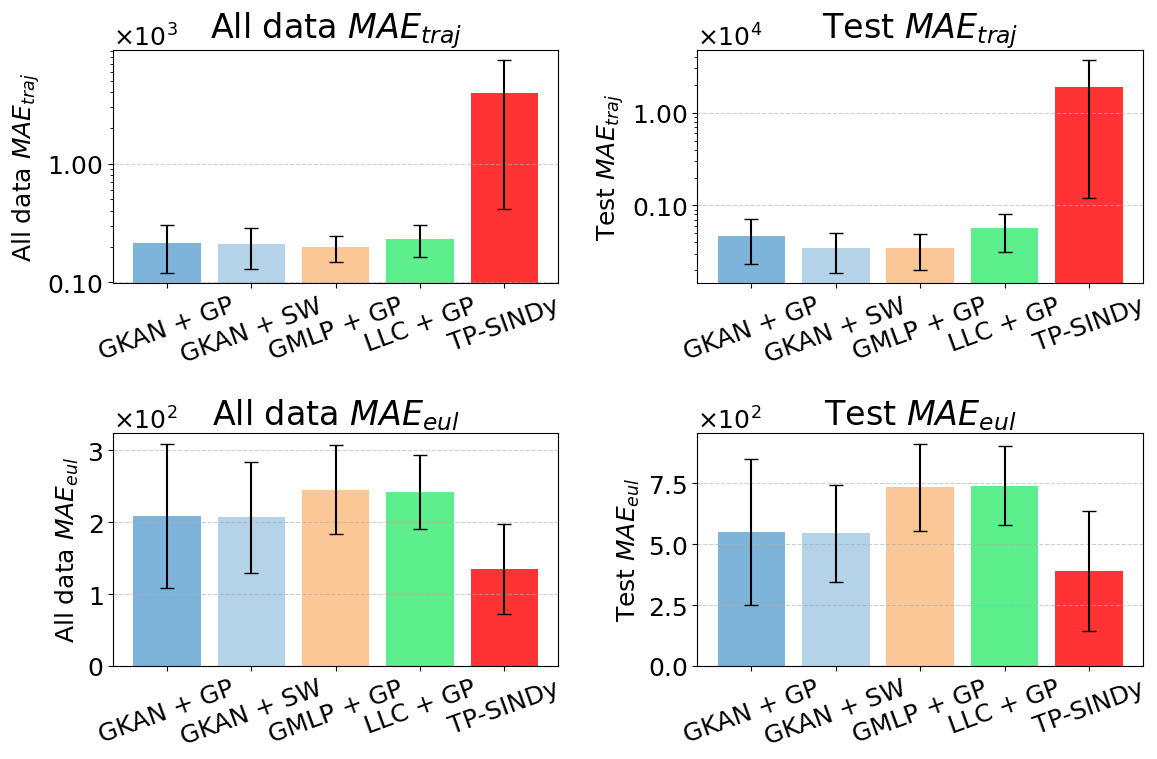

In [5]:
from matplotlib.ticker import ScalarFormatter


tables = {
    r"$\text{All data } MAE_{traj}$": {
        "GKAN + GP": [397.42, 125.45, 116.08],
        "GKAN + SW": [367.49, 132.31, 126.67],
        "GMLP + GP": [295.48, 165.40, 130.71],
        "LLC + GP": [371.19, 168.82, 156.94],
        "TP-SINDy": [10951.21, 718.15, 125.92]
    },
    r"Test $MAE_{traj}$": {
        "GKAN + GP": [950.60, 220.84, 251.79],
        "GKAN + SW": [669.22, 208.47, 171.97],
        "GMLP + GP": [640.31, 210.56, 193.83],
        "LLC + GP": [991.14, 567.99, 137.49],
        "TP-SINDy": [54085.02, 2220.90, 209.77]
    },
    r"All data $MAE_{eul}$": {
        "GKAN + GP": [409.23, 121.04, 96.35],
        "GKAN + SW": [361.22, 127.59, 131.77],
        "GMLP + GP": [334.75, 275.66, 125.98],
        "LLC + GP": [334.60, 236.02, 154.96],
        "TP-SINDy": [258.57, 82.75, 63.02]
    },
    r"Test $MAE_{eul}$": {
        "GKAN + GP": [1148.67, 270.92, 230.18],
        "GKAN + SW": [939.89, 317.63, 377.44],
        "GMLP + GP": [978.90, 838.70, 383.81],
        "LLC + GP": [1049.91, 677.13, 495.01],
        "TP-SINDy": [881.39, 202.74, 88.49],
    },
}
models = list(next(iter(tables.values())).keys())
colors = ["#5fa2d1", '#a2c8e3',  "#fcb97d", "#34eb6e", "red"]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (title, data) in enumerate(tables.items()):
    ax = axes[i]

    means = []
    errors = []
    for model in models:
        values = np.array(data[model])
        mean_val = np.mean(values)
        std_error = np.std(values, ddof=1) / np.sqrt(len(values))  # standard error
        means.append(mean_val)
        errors.append(std_error)

    x = np.arange(len(models))
    ax.bar(x, means, yerr=errors, capsize=5, color=colors, alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=20)
    ax.set_ylabel(title)
    if i < 2:
        ax.set_yscale("log")  

    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci", axis="y", scilimits=(0,0))
    
    ax.set_title(f"{title}")
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    
    

plt.tight_layout()
plt.show()

In [49]:
with open('./data_real_epid_covid_int/RealEpid/countries_dict.json', 'r') as f:
    countries_dict = json.load(f)

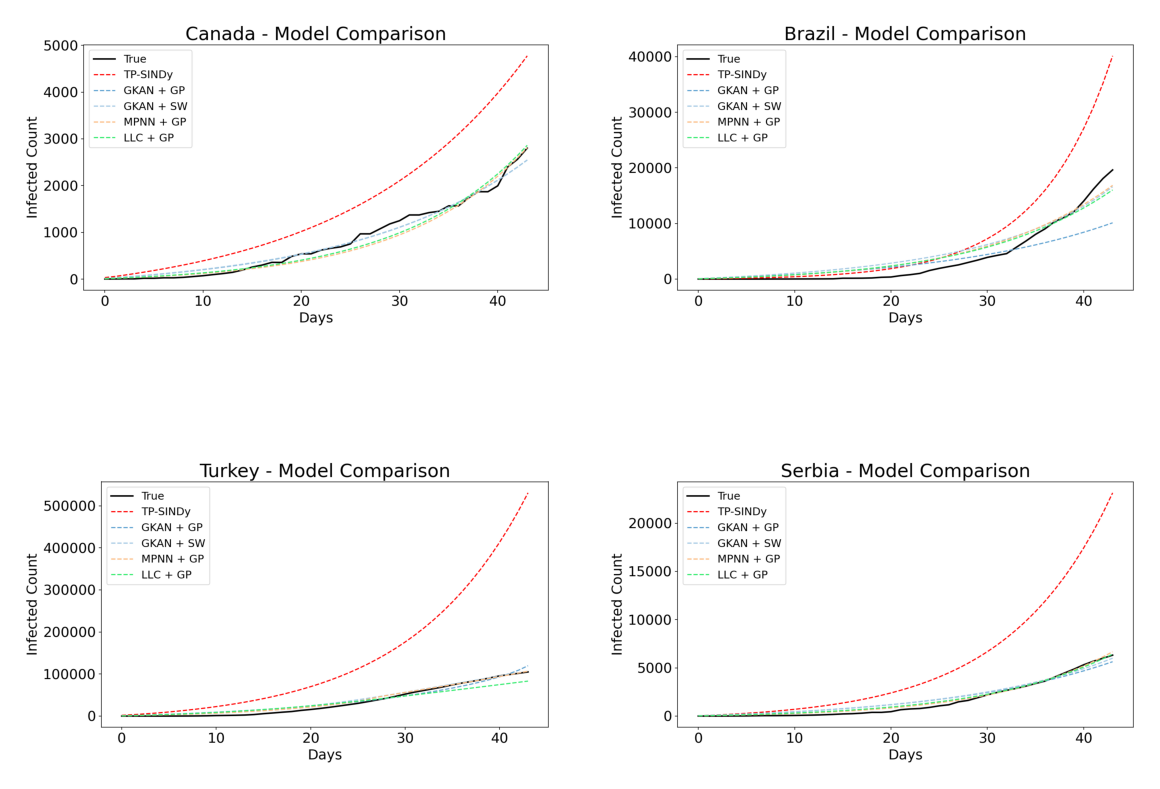

In [58]:
create_random_subplot_grid(
    "./outputs/covid_traj",
    countries=["Canada", "Brazil", "Turkey", "Serbia"]
)

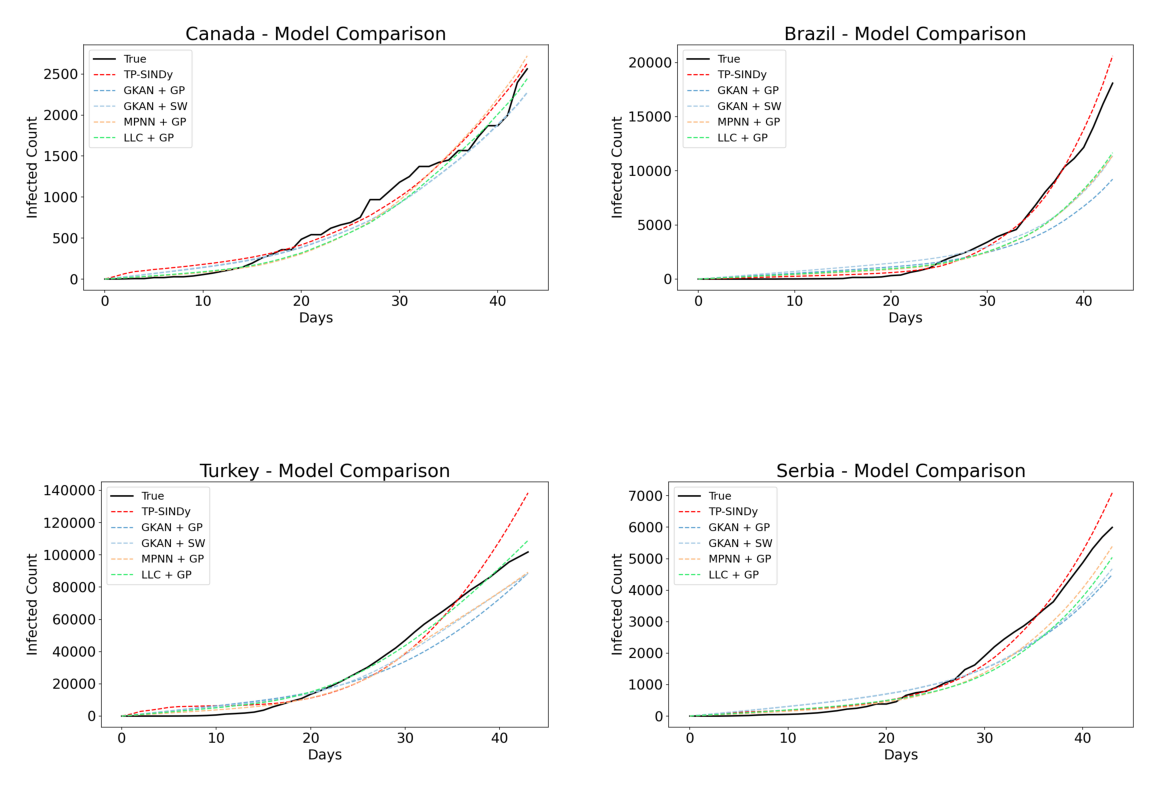

In [51]:
create_random_subplot_grid(
    "./outputs/covid_eul",
    countries=["Canada", "Brazil", "Turkey", "Serbia"]
)

# Ablation

## SW vs. Original SW

In [52]:
res_kur_gkan_orig_sw = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_12/0/sw_orig_kan_final_2.json")
res_epid_gkan_orig_sw = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_12/0/sw_orig_kan_final_2.json")
res_bio_gkan_orig_sw = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_12/0/sw_orig_kan_final_2.json")
res_pop_gkan_orig_sw = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_12/0/sw_orig_kan_final_2.json")

res_gkan_orig_sw = [
    res_kur_gkan_orig_sw,
    res_epid_gkan_orig_sw,
    res_bio_gkan_orig_sw,
    res_pop_gkan_orig_sw
]

In [53]:
import sympy as sp

In [54]:
for r in res_gkan_orig_sw:
    print(r["spline_wise_symb"])
    g_symb = r["spline_wise_g_symb"]
    h_symb = r["spline_wise_h_symb"]
    x_i, x_j = sp.symbols('x_i x_j')
    
    c1 = sp.count_ops(sp.sympify(g_symb))
    c2 = sp.count_ops(sp.sympify(h_symb))
    
    print(f"Complexity: {c1 + c2 + 1}")
    print(f"MAE_Traj: {r["spline_wise_symb_test_MAE"]}")
    print(f"Std: {r["spline_wise_symb_test_Std"]}")
    print()
    

\sum_{j}( -0.500540137290955*sin(-0.999690932577347*x_i + 1.00016665818201*x_j + 3.137460086882)) + 1.99933803081512
Complexity: 8
MAE_Traj: 0.0014301846968010068
Std: 0.0002391511590262365

\sum_{j}( 0.000163771393086854*(-sin(4.99998998641968*x_i - 4.90000009536743) - 0.704415970188217*Abs(4.47864007949829*x_j - 3.36232018470764) - 0.119951455215529)**2 + 2.13506122029604*exp(0.893927802282079*tan(0.103040002286434*x_j - 0.707719922065735) - 0.0513047495085615*tanh(0.559839904308319*x_i - 0.235279932618141)) + 1.22546529769897*sin(0.43627992272377*(1.68460214138031 - 7.32418584823608*tan(0.24071991443634*x_i - 3.08143997192383))*(-1.45424580574036*tan(0.357999920845032*x_j - 3.33755993843079) - 0.257262587547302) + 3.43923997879028) - 0.627609388204291) + 0.979816138744354*sin(1.05773385351722*sin(0.497999936342239*x_i - 0.427759945392609) + 3.45773237056025) - 0.124384090304375
Complexity: 50
MAE_Traj: 0.00014402520415994027
Std: 1.1591333406723858e-05

\sum_{j}( -1.79822423778312*(

## KAN Mult Vs. KAN no mult

In [55]:

res_kur_gkan = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_epid_gkan = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_bio_gkan = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")
res_pop_gkan = load_res("./saved_models_optuna/model-population-gkan/population_gkan_ic1_s5_pd_mult_12/0/post_process_res_2.json")

res_gkan = [res_kur_gkan, res_epid_gkan, res_bio_gkan, res_pop_gkan]

res_kur_gkan_no_mult = load_res("./saved_models_optuna/model-kuramoto-gkan/kuramoto_gkan_no_mult/0/post_process_res_final_seed.json")
res_epid_gkan_no_mult = load_res("./saved_models_optuna/model-epidemics-gkan/epidemics_gkan_no_mult/0/post_process_res_final_seed.json")
res_bio_gkan_no_mult = load_res("./saved_models_optuna/model-biochemical-gkan/biochemical_gkan_no_mult/0/post_process_res_final_seed.json")
res_pop_gkan_no_mult = load_res("./saved_models_optuna/model-population-gkan/population_gkan_no_mult/0/post_process_res_final_seed.json")

res_gkan_no_mult = [res_kur_gkan_no_mult, res_epid_gkan_no_mult, res_bio_gkan_no_mult, res_pop_gkan_no_mult]

In [56]:
datasets = ['KUR', 'EPID', 'BIO', 'POP']

# Data: Mean and Std for each configuration

gkan_losses = [res["model_test_MAE"] for res in res_gkan]
gkan_stds = [res["model_test_Std"] for res in res_gkan]

black_box_means = [res["black_box_symb_test_MAE"] for res in res_gkan]
black_box_stds = [res["black_box_symb_test_Std"] for res in res_gkan] 

spline_means = [res["spline_wise_symb_test_MAE"] for res in res_gkan]
spline_stds  = [res["spline_wise_symb_test_Std"] for res in res_gkan]

gkan_no_mult_losses = [res["model_test_MAE"] for res in res_gkan_no_mult]
gkan_no_mult_stds = [res["model_test_Std"] for res in res_gkan_no_mult]

black_box_no_mult_means = [res["black_box_symb_test_MAE"] for res in res_gkan_no_mult]
black_box_no_mult_stds = [res["black_box_symb_test_Std"] for res in res_gkan_no_mult]

spline_no_mult_means = [res["spline_wise_symb_test_MAE"] for res in res_gkan_no_mult]
spline_no_mult_stds  = [res["spline_wise_symb_test_Std"] for res in res_gkan_no_mult]

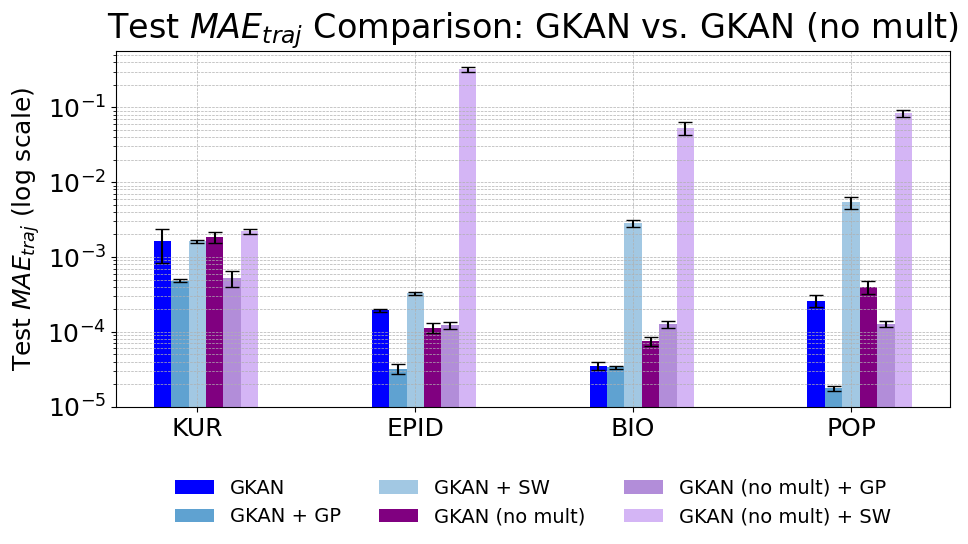

<Figure size 640x480 with 0 Axes>

In [57]:
group_spacing = 1.5
x = np.arange(len(datasets)) * group_spacing
width = 0.12

fig, ax = plt.subplots(figsize=(10, 6))

# Define custom colors
colors = {
    "gkan": ['blue', '#5fa2d1', '#a2c8e3'],  # shades of blue
    "gkan_no_mult": ['purple', '#b28dd9', '#d4b5f5'],  # shades of purple
}

# Offsets for each method
offsets = {
    'GKAN':            -2 * width,
    'GKAN-BB':         -1 * width,
    'GKAN-Spline':      0 * width,
    'GKAN-no-mult':     1 * width,
    'GKAN-no-mult-BB':  2 * width,
    'GKAN-no-mult-SW':  3 * width,
}

# Bars for GKAN (with multiplicative)
ax.bar(x + offsets['GKAN'], gkan_losses, width, 
       yerr=log_error_bars(gkan_losses, gkan_stds), 
       label='GKAN', color=colors["gkan"][0], capsize=5)

ax.bar(x + offsets['GKAN-BB'], black_box_means, width, 
       yerr=log_error_bars(black_box_means, black_box_stds),
       label='GKAN + GP', color=colors["gkan"][1], capsize=5)

ax.bar(x + offsets['GKAN-Spline'], spline_means, width, 
       yerr=log_error_bars(spline_means, spline_stds),
       label='GKAN + SW', color=colors["gkan"][2], capsize=5)

# Bars for GKAN (without multiplicative)
ax.bar(x + offsets['GKAN-no-mult'], gkan_no_mult_losses, width, 
       yerr=log_error_bars(gkan_no_mult_losses, gkan_no_mult_stds), 
       label='GKAN (no mult)', color=colors["gkan_no_mult"][0], capsize=5)

ax.bar(x + offsets['GKAN-no-mult-BB'], black_box_no_mult_means, width, 
       yerr=log_error_bars(black_box_no_mult_means, black_box_no_mult_stds), 
       label='GKAN (no mult) + GP', color=colors["gkan_no_mult"][1], capsize=5)

ax.bar(x + offsets['GKAN-no-mult-SW'], spline_no_mult_means, width, 
       yerr=log_error_bars(spline_no_mult_means, spline_no_mult_stds),
       label='GKAN (no mult) + SW', color=colors["gkan_no_mult"][2], capsize=5)


# Labels and formatting
ax.set_ylabel(r'Test $MAE_{traj}$ (log scale)')
ax.set_title(r'Test $MAE_{traj}$ Comparison: GKAN vs. GKAN (no mult)')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_yscale('log')
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # center it below
    ncol=3,                       # number of columns
    frameon=False                 # cleaner look
)

ax.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()